In [ ]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")

<div dir=rtl>
در این سلول دیتاست خوانده شده و ستون های مرتبط با فیچرها از آن استخراج شده است. سپس پنج سطر ابتدایی آن نمایش داده شده است
</div>

In [ ]:
data = pd.read_excel('dataset.xlsx')[[f"feature {i}" for i in range(20)]]
data.head()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19
0,0,0,0,2,0,13,0,6,1,1,0,1,1,2,7,8,1,1,0,1
1,1,0,6,1,0,11,3,6,5,0,0,1,1,7,7,8,1,2,0,1
2,0,0,6,1,0,3,11,6,1,0,0,1,1,7,7,8,1,2,0,1
3,0,1,6,1,0,3,3,6,1,0,0,1,0,0,0,8,1,2,0,1
4,0,1,1,2,0,13,0,6,1,1,0,1,0,25,24,8,1,1,1,1


<div dir=rtl>
در این سلول مشخصات آماری فیچرها نمایش داده شده است.
</div>

In [ ]:
data.describe()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.30000,0.380000,3.380000,1.560000,0.540000,13.100000,2.920000,5.460000,2.320000,0.320000,0.400000,1.0,0.820000,11.760000,12.400000,7.940000,1.040000,1.280000,0.980000,0.980000
std,0.46291,0.490314,2.448573,0.577115,1.014386,5.047731,4.164182,1.798072,2.226373,0.471212,1.385051,0.0,0.437526,9.325322,9.476071,0.424264,0.402036,0.607437,1.731933,0.141421
min,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,1.000000,1.000000,0.000000,13.000000,0.000000,6.000000,1.000000,0.000000,0.000000,1.0,1.000000,7.000000,7.000000,8.000000,1.000000,1.000000,0.000000,1.000000
50%,0.00000,0.000000,4.000000,2.000000,0.000000,13.000000,0.000000,6.000000,1.000000,0.000000,0.000000,1.0,1.000000,7.000000,7.000000,8.000000,1.000000,1.000000,0.000000,1.000000
75%,1.00000,1.000000,5.750000,2.000000,1.000000,17.000000,6.000000,6.000000,3.750000,1.000000,0.000000,1.0,1.000000,17.500000,18.750000,8.000000,1.000000,2.000000,1.000000,1.000000
max,1.00000,1.000000,7.000000,2.000000,3.000000,20.000000,11.000000,7.000000,9.000000,1.000000,6.000000,1.0,2.000000,33.000000,32.000000,8.000000,2.000000,2.000000,5.000000,1.000000


<div dir=rtl>
در این سلول توزیع فیچرها رسم شده است.
</div>

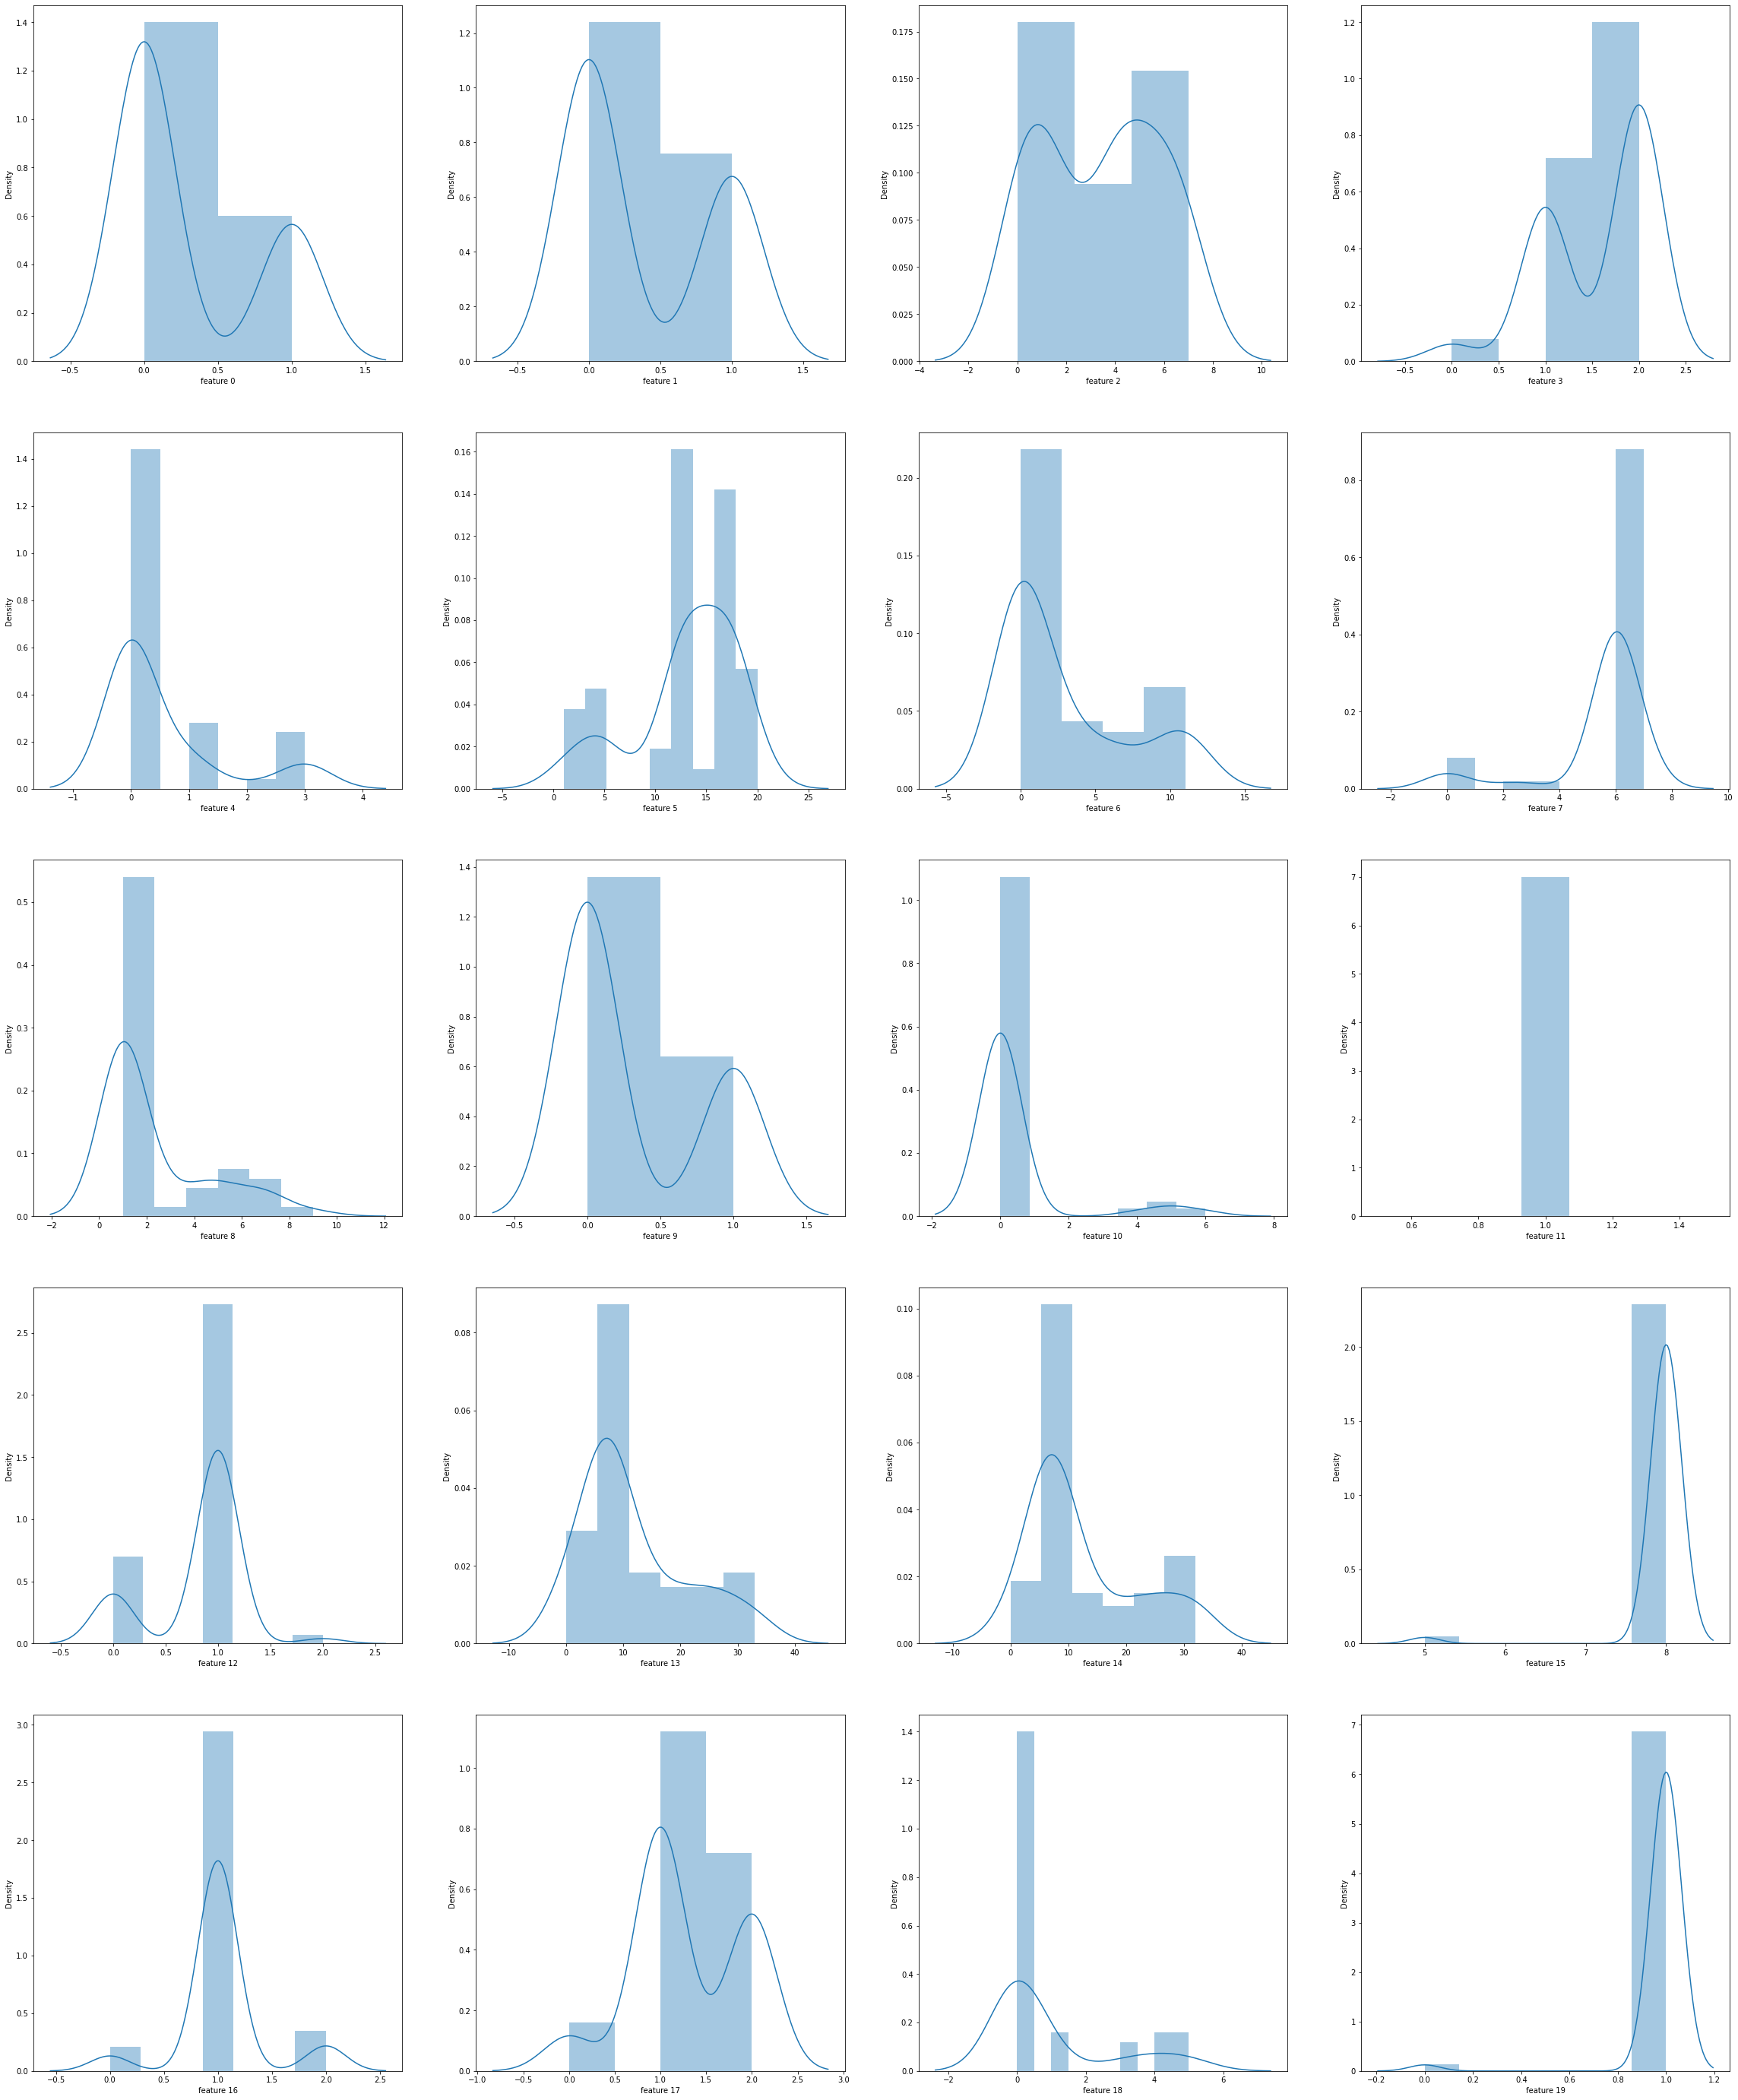

In [ ]:
fig,axes=plt.subplots(5,4, figsize = (40, 50))

for i in range(5):
    for j in range(4):
        sns.distplot(data[f'feature {4 * i + j}'], ax = axes[i, j])   

plt.show()

<div dir=rtl>
در این سلول فراوانی مقادیر هر کدام از فیچرها ترسیم شده است.
</div>

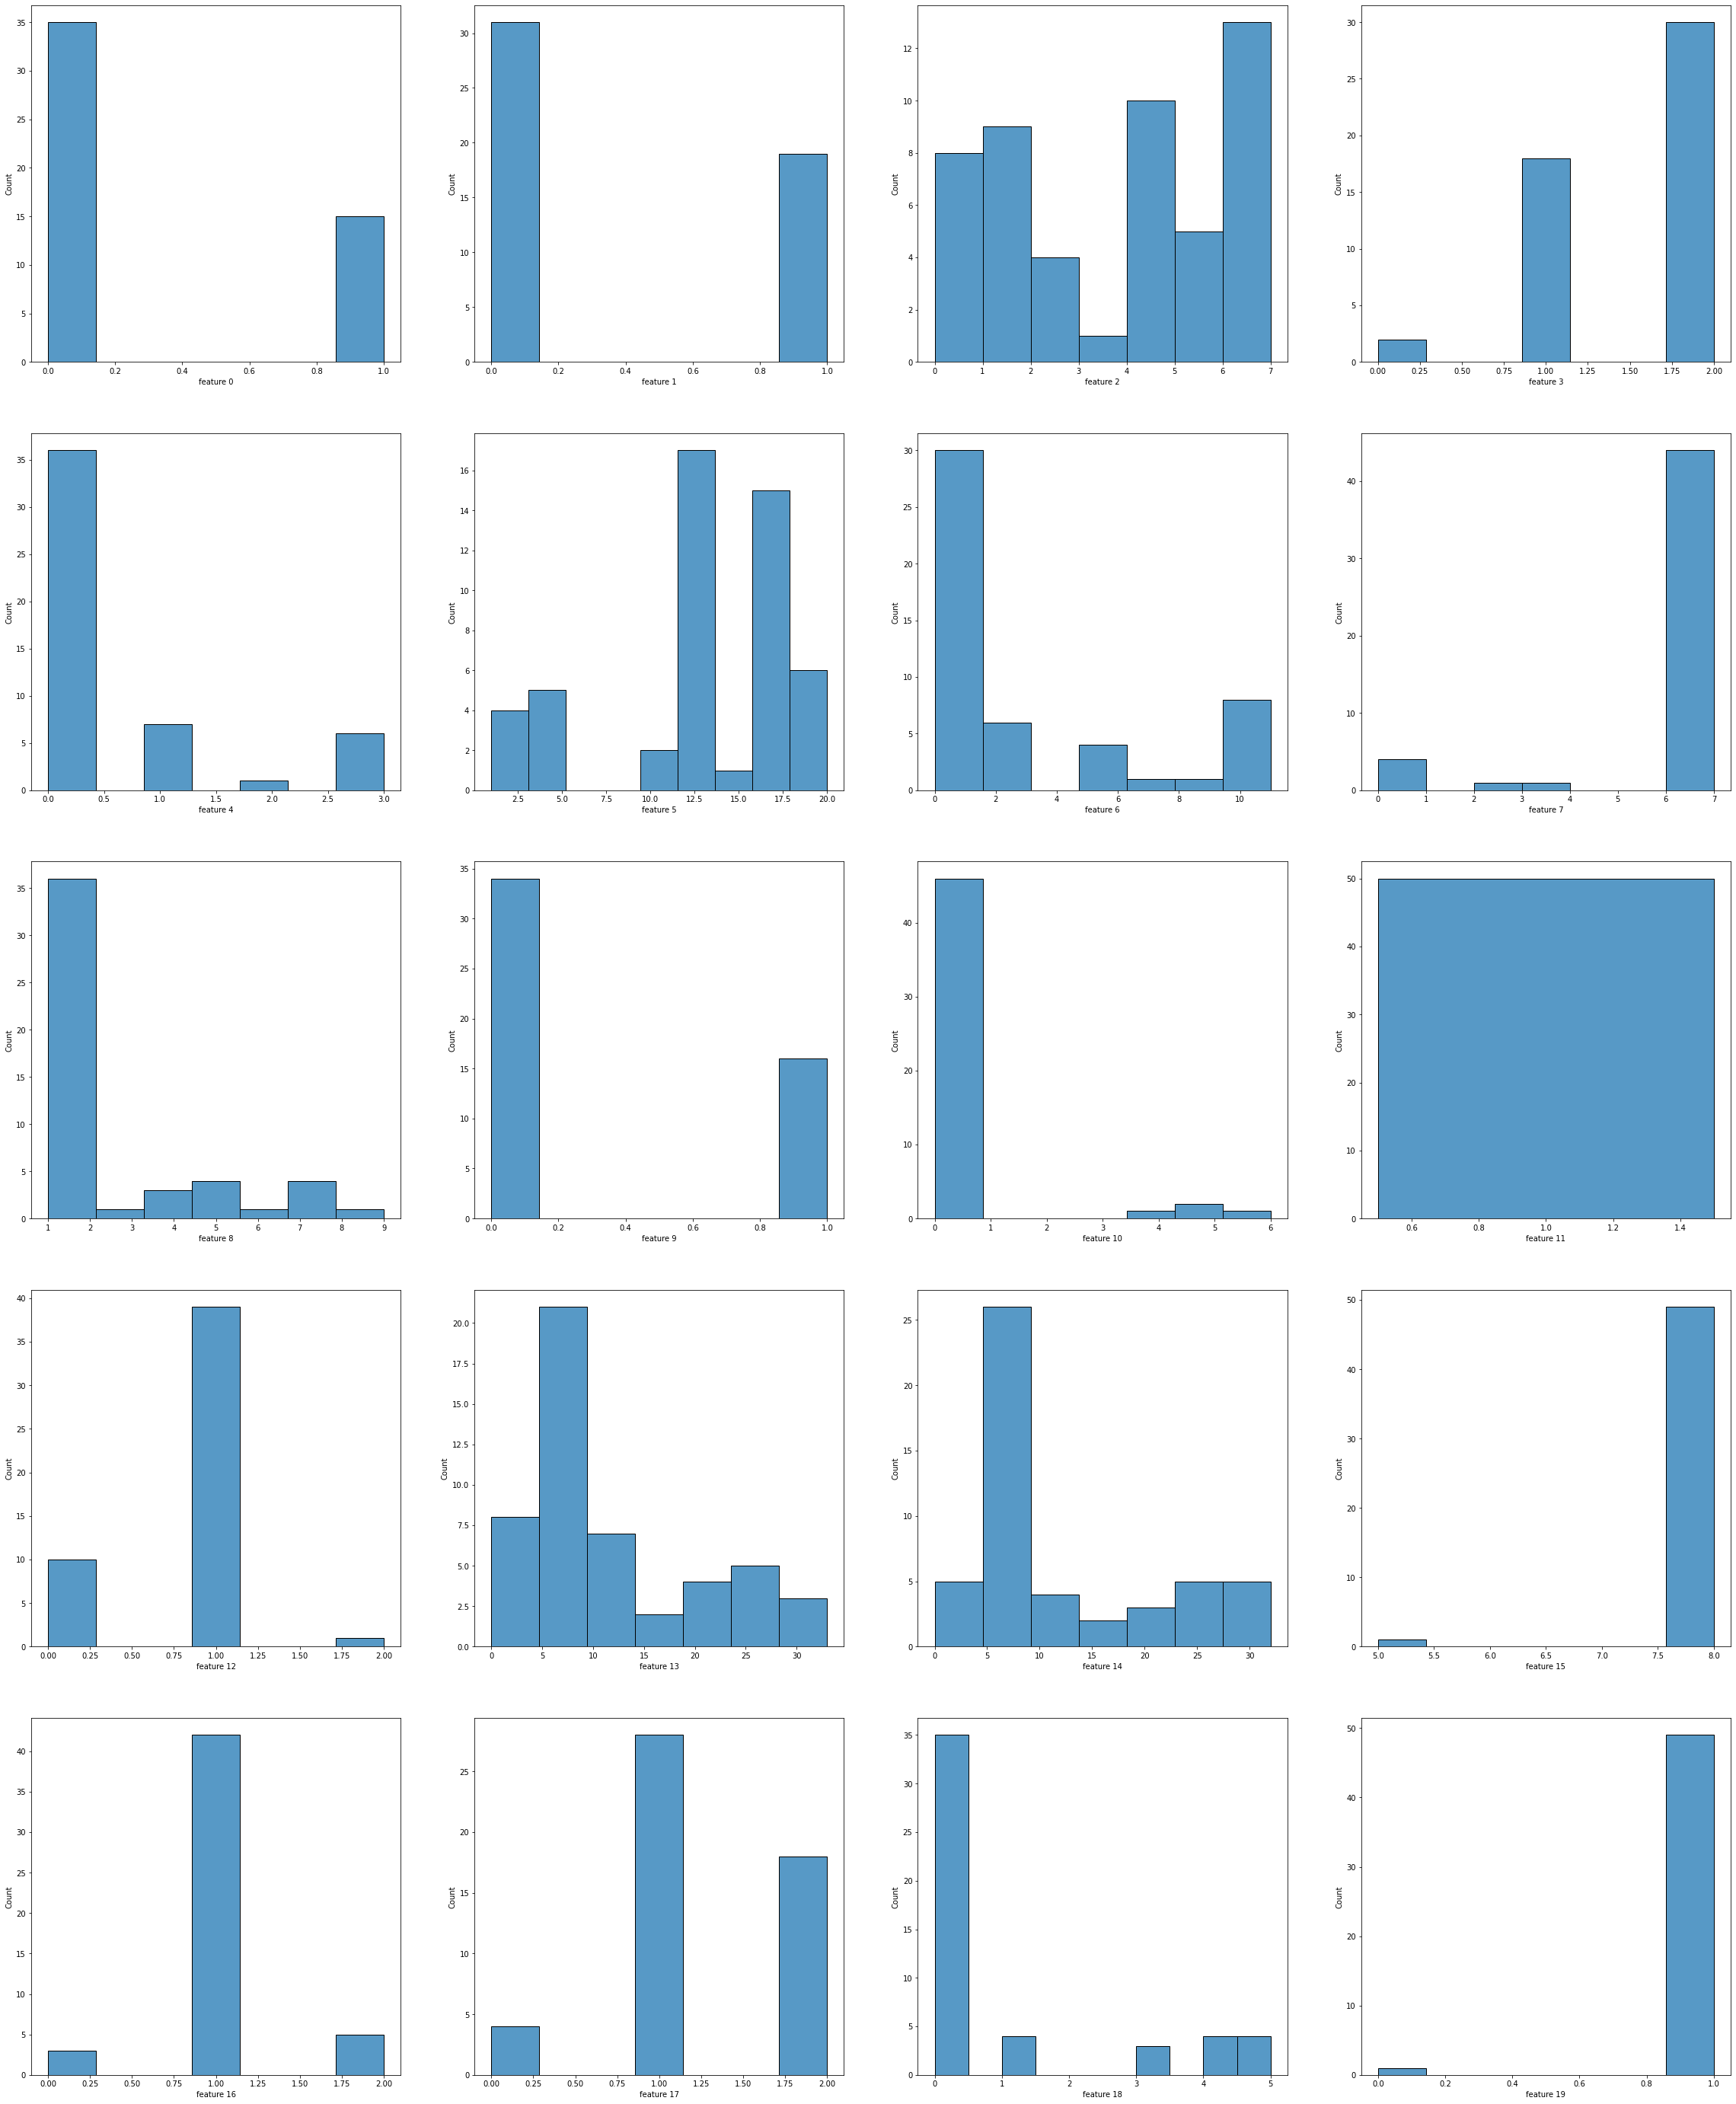

In [ ]:
fig,axes=plt.subplots(5,4, figsize = (40, 50))

for i in range(5):
    for j in range(4):
        sns.histplot(data[f'feature {4 * i + j}'], ax = axes[i, j])   

plt.show()

<div dir=rtl>
در این سلول در ابتدا با استفاده از تعداد مختلف  کلاستر از پیش تعریف شده و با استفاده از متد چند میانگین کلاسترینگ انجام شده و سپس با استفاده از تحلیل مولفه اساسی، ابعاد دیتا برای ترسیم به دو کاهش داده شده و ترسیم داده های کلاستر شده در دو بعد انجام شده است.
</div>

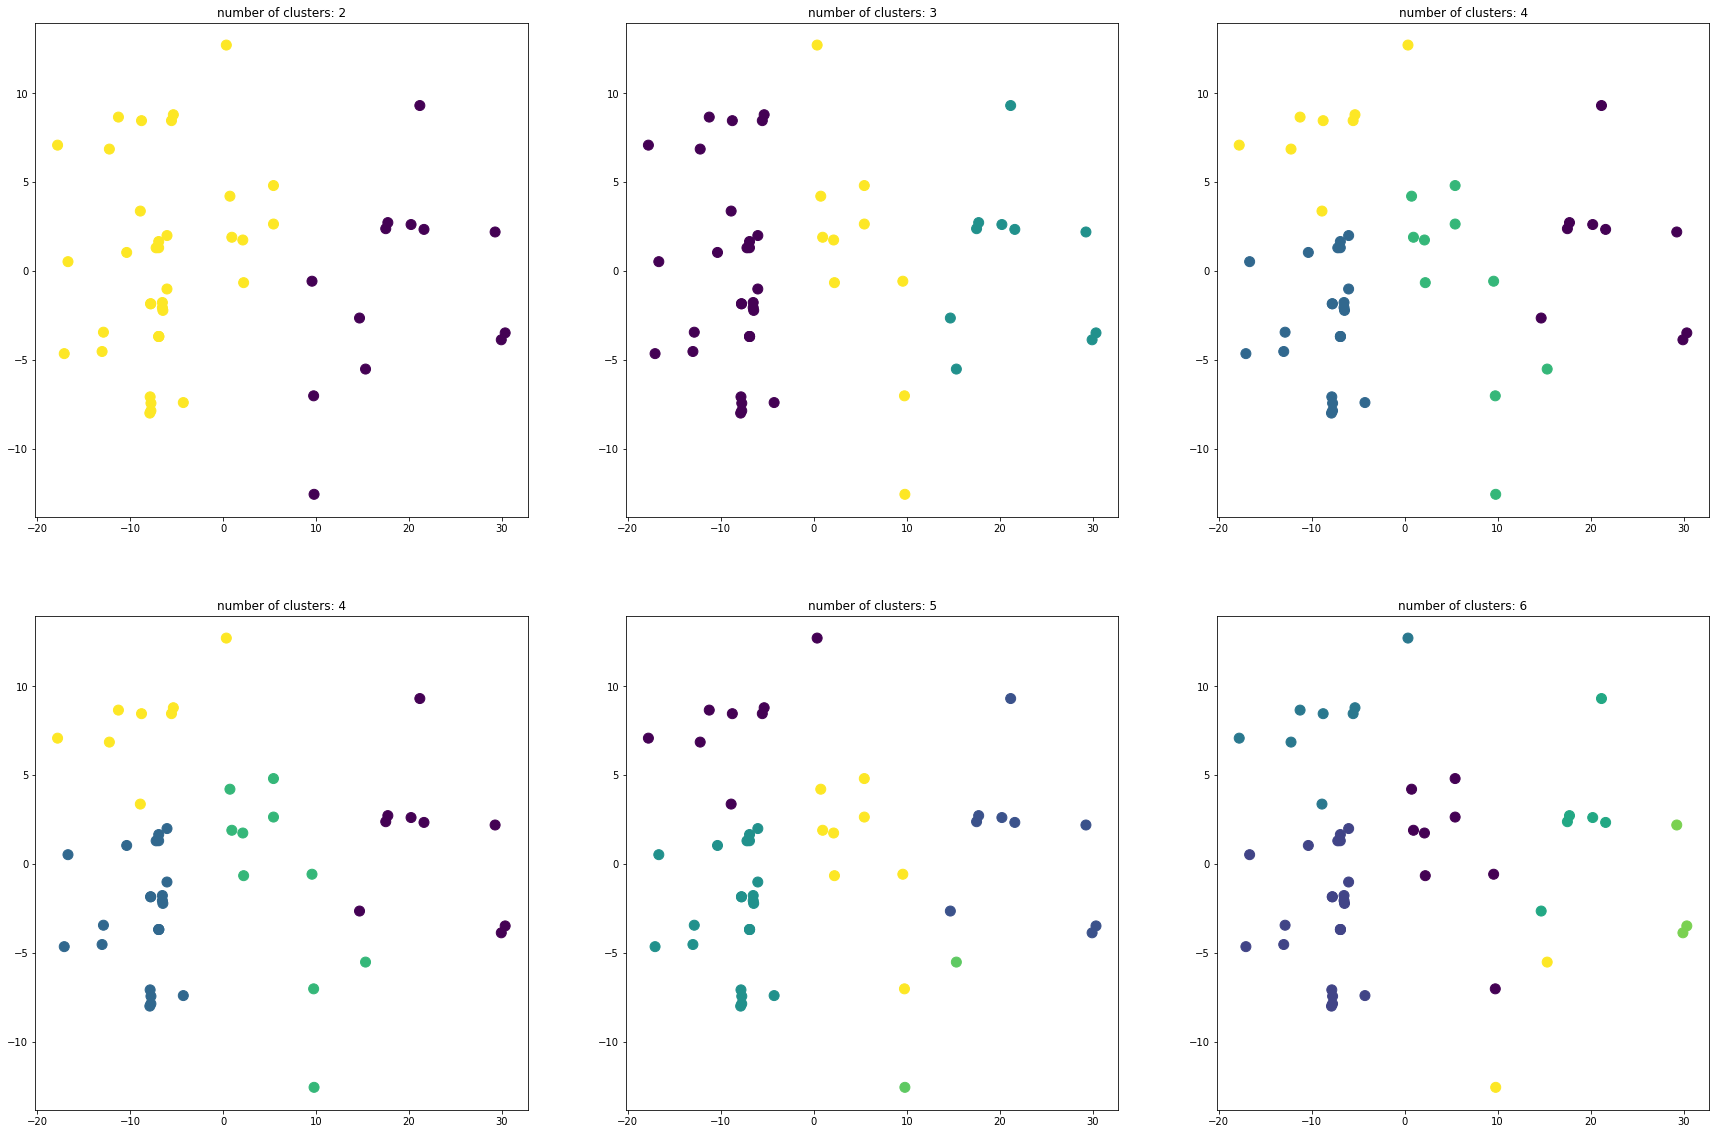

In [ ]:
n_clusters = [2,3,4,5,6,7]
a_data = data.values
fig,axes=plt.subplots(2,3, figsize = (30, 20))

for i in range(2):
    for j in range(3):
        kmeans = KMeans(n_clusters=n_clusters[2 * i + j], random_state=0).fit(a_data)
        label  = kmeans.labels_
        pca = PCA(n_components=2)
        x = pca.fit_transform(a_data.copy())
        axes[i, j].scatter(x[:, 0], x[:, 1], c = label, s = 100)
        axes[i, j].set_title(f'number of clusters: {n_clusters[2 * i + j]}')

<div dir=rtl>
در این سلول به ازای سه مقدار مختلف برای اپسیلون و سه مقدار مختلف برای کمترین مقدار نمونه، و با استفاده از متد دی بی اس سی ای ان کلاسترینگ را انجام میدهیم. و سپس با استفاده از تحلیل مولفه اساسی، ابعاد دیتا برای ترسیم به دو کاهش داده شده و ترسیم داده های کلاستر شده در دو بعد انجام شده است.
</div>

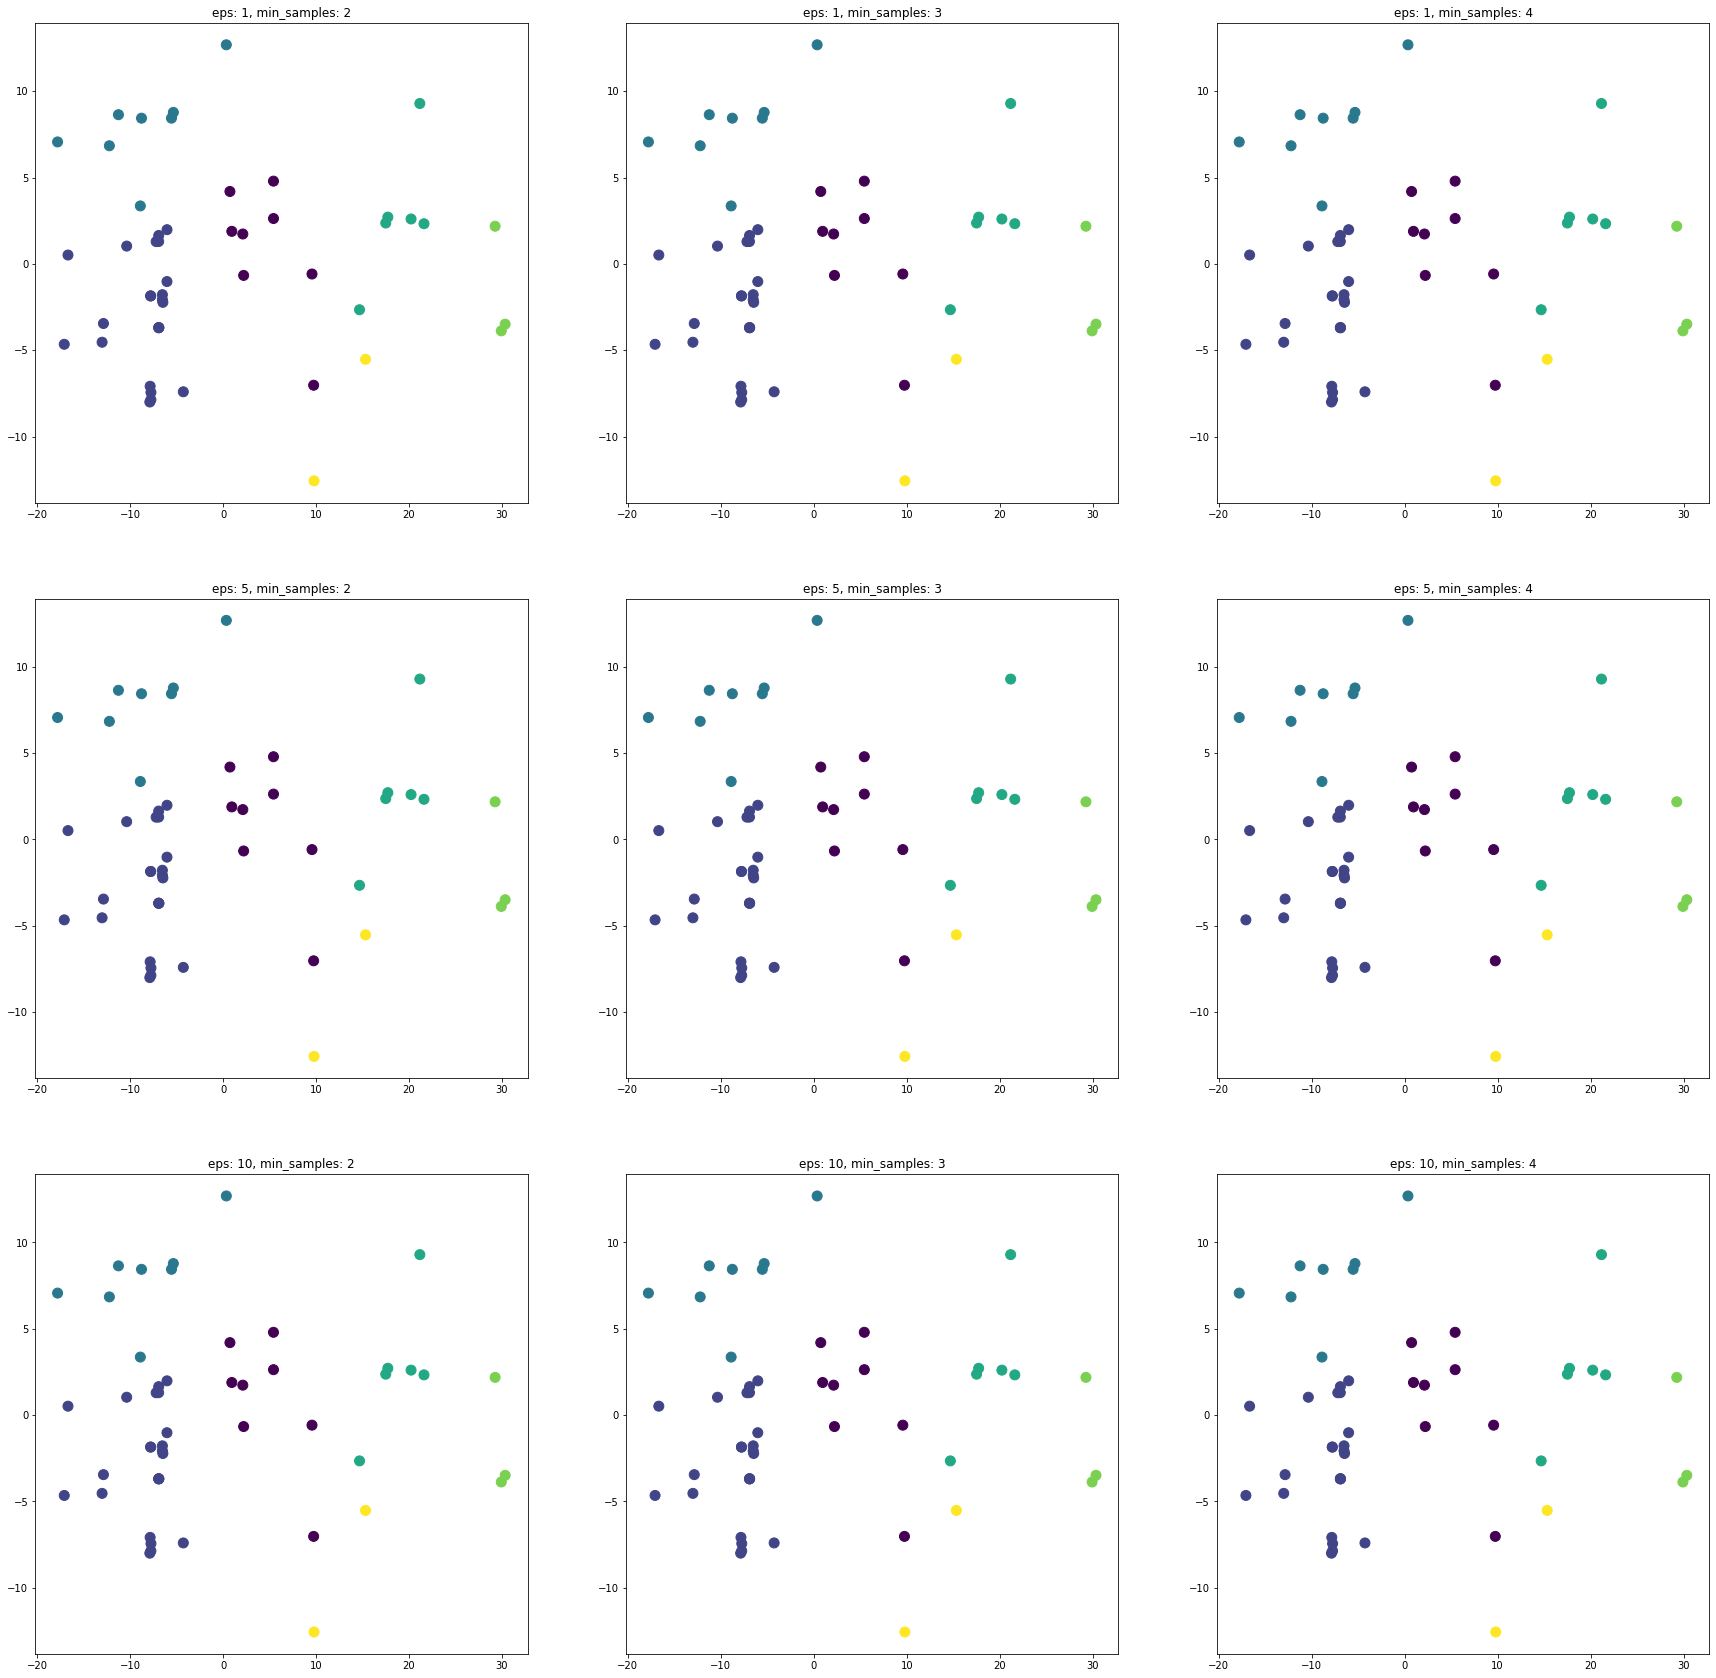

In [ ]:
EPS   = [1, 5, 10]
SMPLS = [2, 3, 4]


fig,axes=plt.subplots(3,3, figsize = (30, 30))

for i in range(3):
    for j in range(3):
        dbscan = DBSCAN(eps=EPS[i], min_samples = SMPLS[j]).fit(a_data)
        label  = kmeans.labels_
        pca = PCA(n_components=2)
        x = pca.fit_transform(a_data.copy())
        axes[i, j].scatter(x[:, 0], x[:, 1], c = label, s = 100)
        axes[i, j].set_title(f'eps: {EPS[i]}, min_samples: {SMPLS[j]}')